# Welcome

## Introduction

In this Jupyter notebook we will explore the rank of Greece according to the **World Happiness Report**
during the period from 2015-2019.

For more information about the datasets please read the **README.md** file in my [GitHub repository](https://github.com/Stathis-Kal/world-happiness).

In [1]:
import numpy as np  
import pandas as pd 
import folium

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# READ THE CSV FILES
gr_2015 = pd.read_csv('2015.csv')

gr_2016 = pd.read_csv('2016.csv')

gr_2017 = pd.read_csv('2017.csv')

gr_2018 = pd.read_csv('2018.csv')

gr_2019 = pd.read_csv('2019.csv')

In [3]:
# Change the index of csv's

gr_2015.set_index('Country', inplace=True)

gr_2016.set_index('Country', inplace=True)

gr_2017.set_index('Country', inplace=True)

gr_2018.set_index('Country or region', inplace=True)

gr_2019.set_index('Country or region', inplace=True)

In [4]:
# Get the data only for Greece

gr_2015 = gr_2015.loc[['Greece']]

gr_2016 = gr_2016.loc[['Greece']]

gr_2017 = gr_2017.loc[['Greece']]

gr_2018 = gr_2018.loc[['Greece']]

gr_2019 = gr_2019.loc[['Greece']]

In [5]:
# Prepare the df's for concatenation

gr_2015.drop(gr_2015.columns[3:], axis=1, inplace=True)

gr_2016.drop(gr_2016.columns[3:], axis=1, inplace=True)

gr_2017.drop(gr_2017.columns[2:], axis=1, inplace=True)

gr_2018.drop(gr_2018.columns[2:], axis=1, inplace=True)

gr_2019.drop(gr_2019.columns[2:], axis=1, inplace=True)

gr_2015.drop(['Region'], axis=1, inplace=True)

gr_2016.drop(['Region'], axis=1, inplace=True)


In [6]:
# Rename the columns for consistency

gr_2017.rename(columns={'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score'}, inplace=True)
                        
gr_2018.rename(columns={'Overall rank':'Happiness Rank', 'Score':'Happiness Score'}, inplace=True)

gr_2019.rename(columns={'Overall rank':'Happiness Rank', 'Score':'Happiness Score'}, inplace=True)

gr_2018.index.rename('Country', inplace='True')

gr_2019.index.rename('Country', inplace='True')

In [7]:
# Merge df's

df = pd.concat([gr_2015, gr_2016, gr_2017, gr_2018, gr_2019], sort=False)

# append the years 
years = list(map(str,range(2015,2020)))

df['Years'] = years

df.set_index('Years', inplace=True)

In [8]:
# How our final data looks like
df 

,Happiness Rank,Happiness Score
Years,,
2015,102,4.857
2016,99,5.033
2017,87,5.227
2018,79,5.358
2019,82,5.287


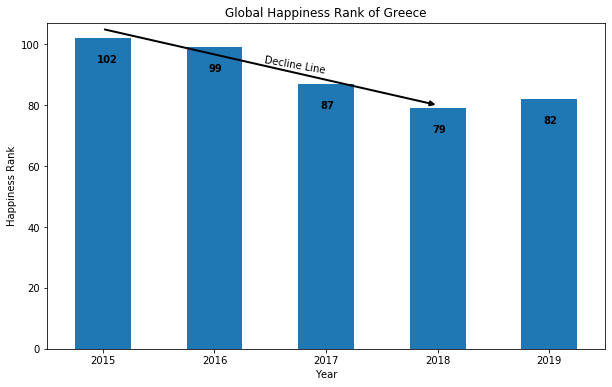

In [9]:
df1 = df['Happiness Rank']

df1.plot(kind='bar', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Happiness Rank')
plt.title('Global Happiness Rank of Greece')
plt.xticks(rotation=0)

for index, value in enumerate(df1):
    plt.text(index - 0.05, value - 8, str(value), fontweight='bold')

plt.annotate('',                      
             xy=(3, 80),              
             xytext=(0, 105),          
             xycoords='data',         
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3', lw=2)
            )

plt.annotate('Decline Line', 
             xy=(2, 90),                 
             rotation=-10,                  
             va='bottom',                   
             ha='right',
            )

plt.show()

From the upper plot we can deduce a decline in rankings from 2015 to 2018.

This is good because lower ranks equals happier people! 🙂

Before continuing our further analysis in the data set of 2019. Lets get some numerical insights to help us understand Greece's position a little better.

In [10]:
# the mean value of Happiness Rank

df['Happiness Rank'].mean()

89.8

In [11]:
# the mean value of Happiness Score

df['Happiness Score'].mean()

5.152400047302247

In [12]:
# now lets round them up

print('The rounded value of Happiness Rank is {}.\nThe rounded value of Happiness Score is {}.'.format(round(df['Happiness Rank'].mean()),round(df['Happiness Score'].mean())))

The rounded value of Happiness Rank is 90.
The rounded value of Happiness Score is 5.


As we can figure out from the upper calculations Greece is ranked average in the 90th position with the average happiness score of 5.

Now it's time to explore the 2019 dataset and observe how Greece is competing with the other European countries in the global leaderboard.

In [13]:
# read the csv

df_2019 = pd.read_csv('2019.csv')

df_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Because our dataset **does not contains** the information about the continent of each country, I'm gonna insert this information into our dataset and then extract all the European countries into a new dataframe.

In [14]:
# a list with the countries of Europe as found in https://www.countries-ofthe-world.com/countries-of-europe.html

countries_of_europe = ['Albania'
,'Andorra'
,'Armenia'
,'Austria'
,'Azerbaijan'
,'Belarus'
,'Belgium'
,'Bosnia and Herzegovina'
,'Bulgaria'
,'Croatia'
,'Cyprus'
,'Czechia'
,'Denmark'
,'Estonia'
,'Finland'
,'France'
,'Georgia'
,'Germany'
,'Greece'
,'Hungary'
,'Iceland'
,'Ireland'
,'Italy'
,'Kazakhstan'
,'Kosovo'
,'Latvia'
,'Liechtenstein'
,'Lithuania'
,'Luxembourg'
,'Malta'
,'Moldova'
,'Monaco'
,'Montenegro'
,'Netherlands'
,'North Macedonia'
,'Norway'
,'Poland'
,'Portugal'
,'Romania'
,'Russia'
,'San Marino'
,'Serbia'
,'Slovakia'
,'Slovenia'
,'Spain'
,'Sweden'
,'Switzerland'
,'Turkey'
,'Ukraine'
,'United Kingdom'
,'Vatican City']

In [15]:
# Add a new column [Continent] and insert the value Europe for all the rows which the value of column [Contry or region] matches
# the value of the list countries_of_europe.

df_2019['Continent'] = np.where(df_2019['Country or region'].isin(countries_of_europe), 'Europe', 'another continent')

df_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,another continent
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,another continent
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,another continent
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,another continent


In [16]:
# Get the countries of europe only

df_2019 = df_2019.loc[df_2019['Continent'] == 'Europe']

# Get the desired columns 

df_2019 = df_2019[['Overall rank', 'Country or region', 'Score']]

In [17]:
# Rename the columns for consistency

df_2019.rename(columns={'Overall rank':'Happiness Rank', 'Country or region': 'Country', 'Score':'Happiness Score'}, inplace=True)

# Change the index

df_2019.set_index('Country', inplace=True)

In [18]:
# How our final data looks like

df_2019

,Happiness Rank,Happiness Score
Country,,
Finland,1,7.769
Denmark,2,7.600
Norway,3,7.554
Iceland,4,7.494
Netherlands,5,7.488
Switzerland,6,7.480
Sweden,7,7.343
Austria,10,7.246
Luxembourg,14,7.090


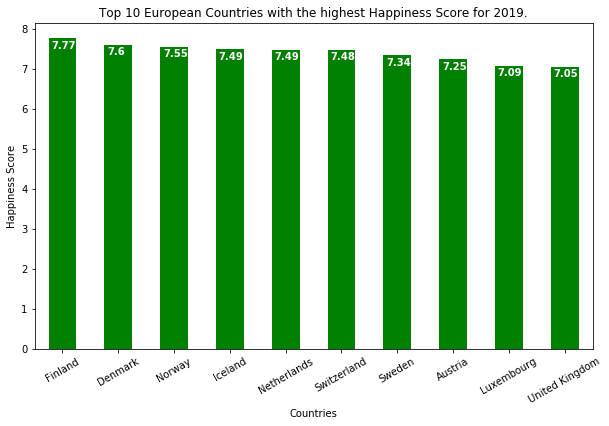

In [19]:
# create the bar chart of top 10 European Countries

df_2019_top10 = df_2019['Happiness Score'].head(10)

df_2019_top10.plot(kind='bar', figsize=(10,6), color='Green')
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
plt.title('Top 10 European Countries with the highest Happiness Score for 2019.')
plt.xticks(rotation=30)

for index, value in enumerate(df_2019_top10):
    plt.text(index - 0.20, value - 0.25, str(round(value,2)), color='White', fontweight='bold')

plt.show()

From the upper plot we can infer that the most happier countries in Europe are those who belong in the subregion of Scandinavia.
Now let's see which countries are ranked down to bottom 10.

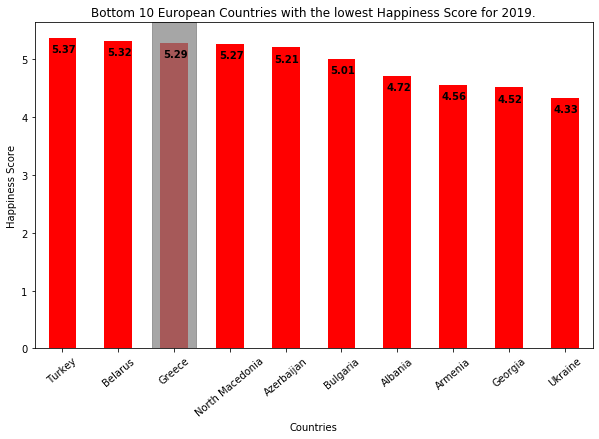

In [20]:
# create the bar chart of bottom 10 European Countries

df_2019_bot10 = df_2019['Happiness Score'].tail(10)

df_2019_bot10.plot(kind='bar', figsize=(10,6), color='red')
plt.xlabel('Countries')
plt.ylabel('Happiness Score')
plt.title('Bottom 10 European Countries with the lowest Happiness Score for 2019.')
plt.xticks(rotation=40)

for index, value in enumerate(df_2019_bot10):
    plt.text(index - 0.2, value - 0.25, str(round(value,2)), fontweight='bold')
    
plt.axvspan(1.6, 2.4, color='grey', alpha=0.7)

plt.show()

We found Greece to be among with the bottom 10 countries who have the lowest happiness score.

In [21]:
mean_2019 = round(df_2019['Happiness Score'].mean(),2)

gr_score = round(df_2019.loc['Greece']['Happiness Score'],2)

dif = round(mean_2019 - gr_score, 2)

print('The mean value of Happiness Score for the year 2019 is {}\nGreece\'s Happiness Score is {}'.format(mean_2019, gr_score))

print('Greece is {} behind the average Happiness Score 😔.'.format(dif))

The mean value of Happiness Score for the year 2019 is 6.12
Greece's Happiness Score is 5.29
Greece is 0.83 behind the average Happiness Score 😔.


Now let's observe the map of Europe using a **choropleth map** to determine with one glance the *Happiness Score* of each country.

In [22]:
# create choropleth map of Europe

europe_geo = f'europe.json'

data = pd.read_csv('2019.csv')

europe = folium.Map(location=[54.5260, 15.2551], zoom_start=4)

europe.choropleth(
 geo_data=europe_geo,
 name='choropleth',
 data=data,
 columns=['Country or region', 'Score'],
 key_on='properties.NAME',
 fill_color='PuBuGn',
 fill_opacity=0.7,
 line_opacity=0.6,
 legend_name='Happiness Score',
 highlight=True
)

europe 

## Conclusion

From this Jupyter Notebook report we can interpret that Greece's *Happiness Score* is moderate. Taking into consideration that Greece's avarage score is 5 as we saw earlier in the start of the notebook. However when we placed Greece head-to-head with the other countries of Europe, we identified that Greece's score is actually very grim.

<hr>

By [Stathis Kaloutsidis](https://gr.linkedin.com/in/efstathios-kaloutsidis).